# **PREDICTING HOUSE PRICES USING REGRESSION**

## **📥 Downloading and Extracting the Dataset**
Before we start building our house price prediction model, we need to download the dataset from Kaggle and extract its contents.

### **1️⃣ Install Kaggle API**  
The Kaggle API is required to download datasets directly from Kaggle. If you haven't installed it yet, run the command below:  

In [ ]:
%pip install kaggle

### **2️⃣ Download the Dataset**

Use the following command to download the dataset from the Kaggle competition:

In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|██████████| 199k/199k [00:00<00:00, 336kB/s]
100%|██████████| 199k/199k [00:00<00:00, 335kB/s]


### **3️⃣ Extract the Dataset**

The dataset is stored as a ZIP file. We need to extract it before using it in our model.

In [265]:
import zipfile
import os

dataset_zip = "../data/house-prices-advanced-regression-techniques.zip"
dataset_folder = "../data/raw"

with zipfile.ZipFile(dataset_zip, 'r') as folder:
    folder.extractall(dataset_folder)
    

os.listdir(dataset_folder)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

## 📊 **Loading the Dataset**
Now that we have extracted the dataset, let's load it into Pandas DataFrames for further analysis.

### **1️⃣ Install Pandas**  
Pandas is a powerful library for data manipulation and analysis. If you haven't installed it yet, you can do so using:


In [ ]:
%pip install pandas

In [2]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None)

### **2️⃣ Load the Dataset into Pandas**

- We will use pd.read_csv() to load both the training and test datasets.
- The .head() function allows us to preview the first five rows of the training dataset. This helps us understand the structure of the data, including the features and target variable.

In [3]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **🔍 Exploratory Data Analysis**

### **1️⃣ Check for missing values**
- Get the amount of missing values in each column.
- Get the percentage of the missing values.

In [6]:
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_percentage = (missing_values / len(train_df) * 100)
missing_percentage = missing_percentage[missing_percentage > 0]

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentage
})

missing_data

,Missing Values,Missing Percentage (%)
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,872,59.726027
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


- Create a bar plot to visualize the percentage of missing data for each feature

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

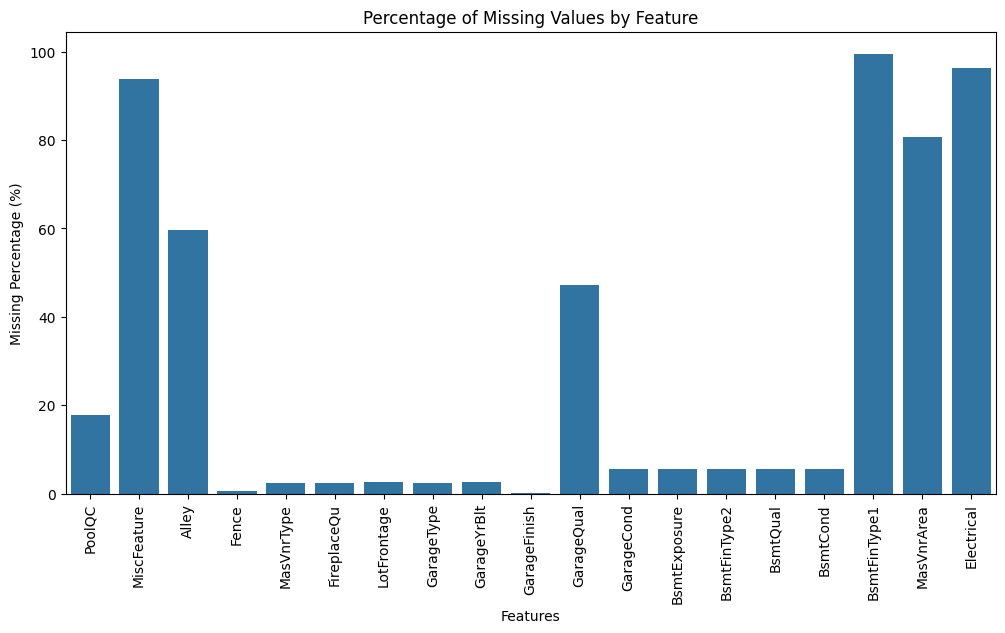

In [39]:
missing_data_sorted = missing_data.sort_values(by="Missing Percentage (%)", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_data_sorted.index, y=missing_data["Missing Percentage (%)"])

plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing Percentage (%)")
plt.title("Percentage of Missing Values by Feature")
plt.show()


- Find the relationship of each feature with missing values to SalePrice (dependent variable).

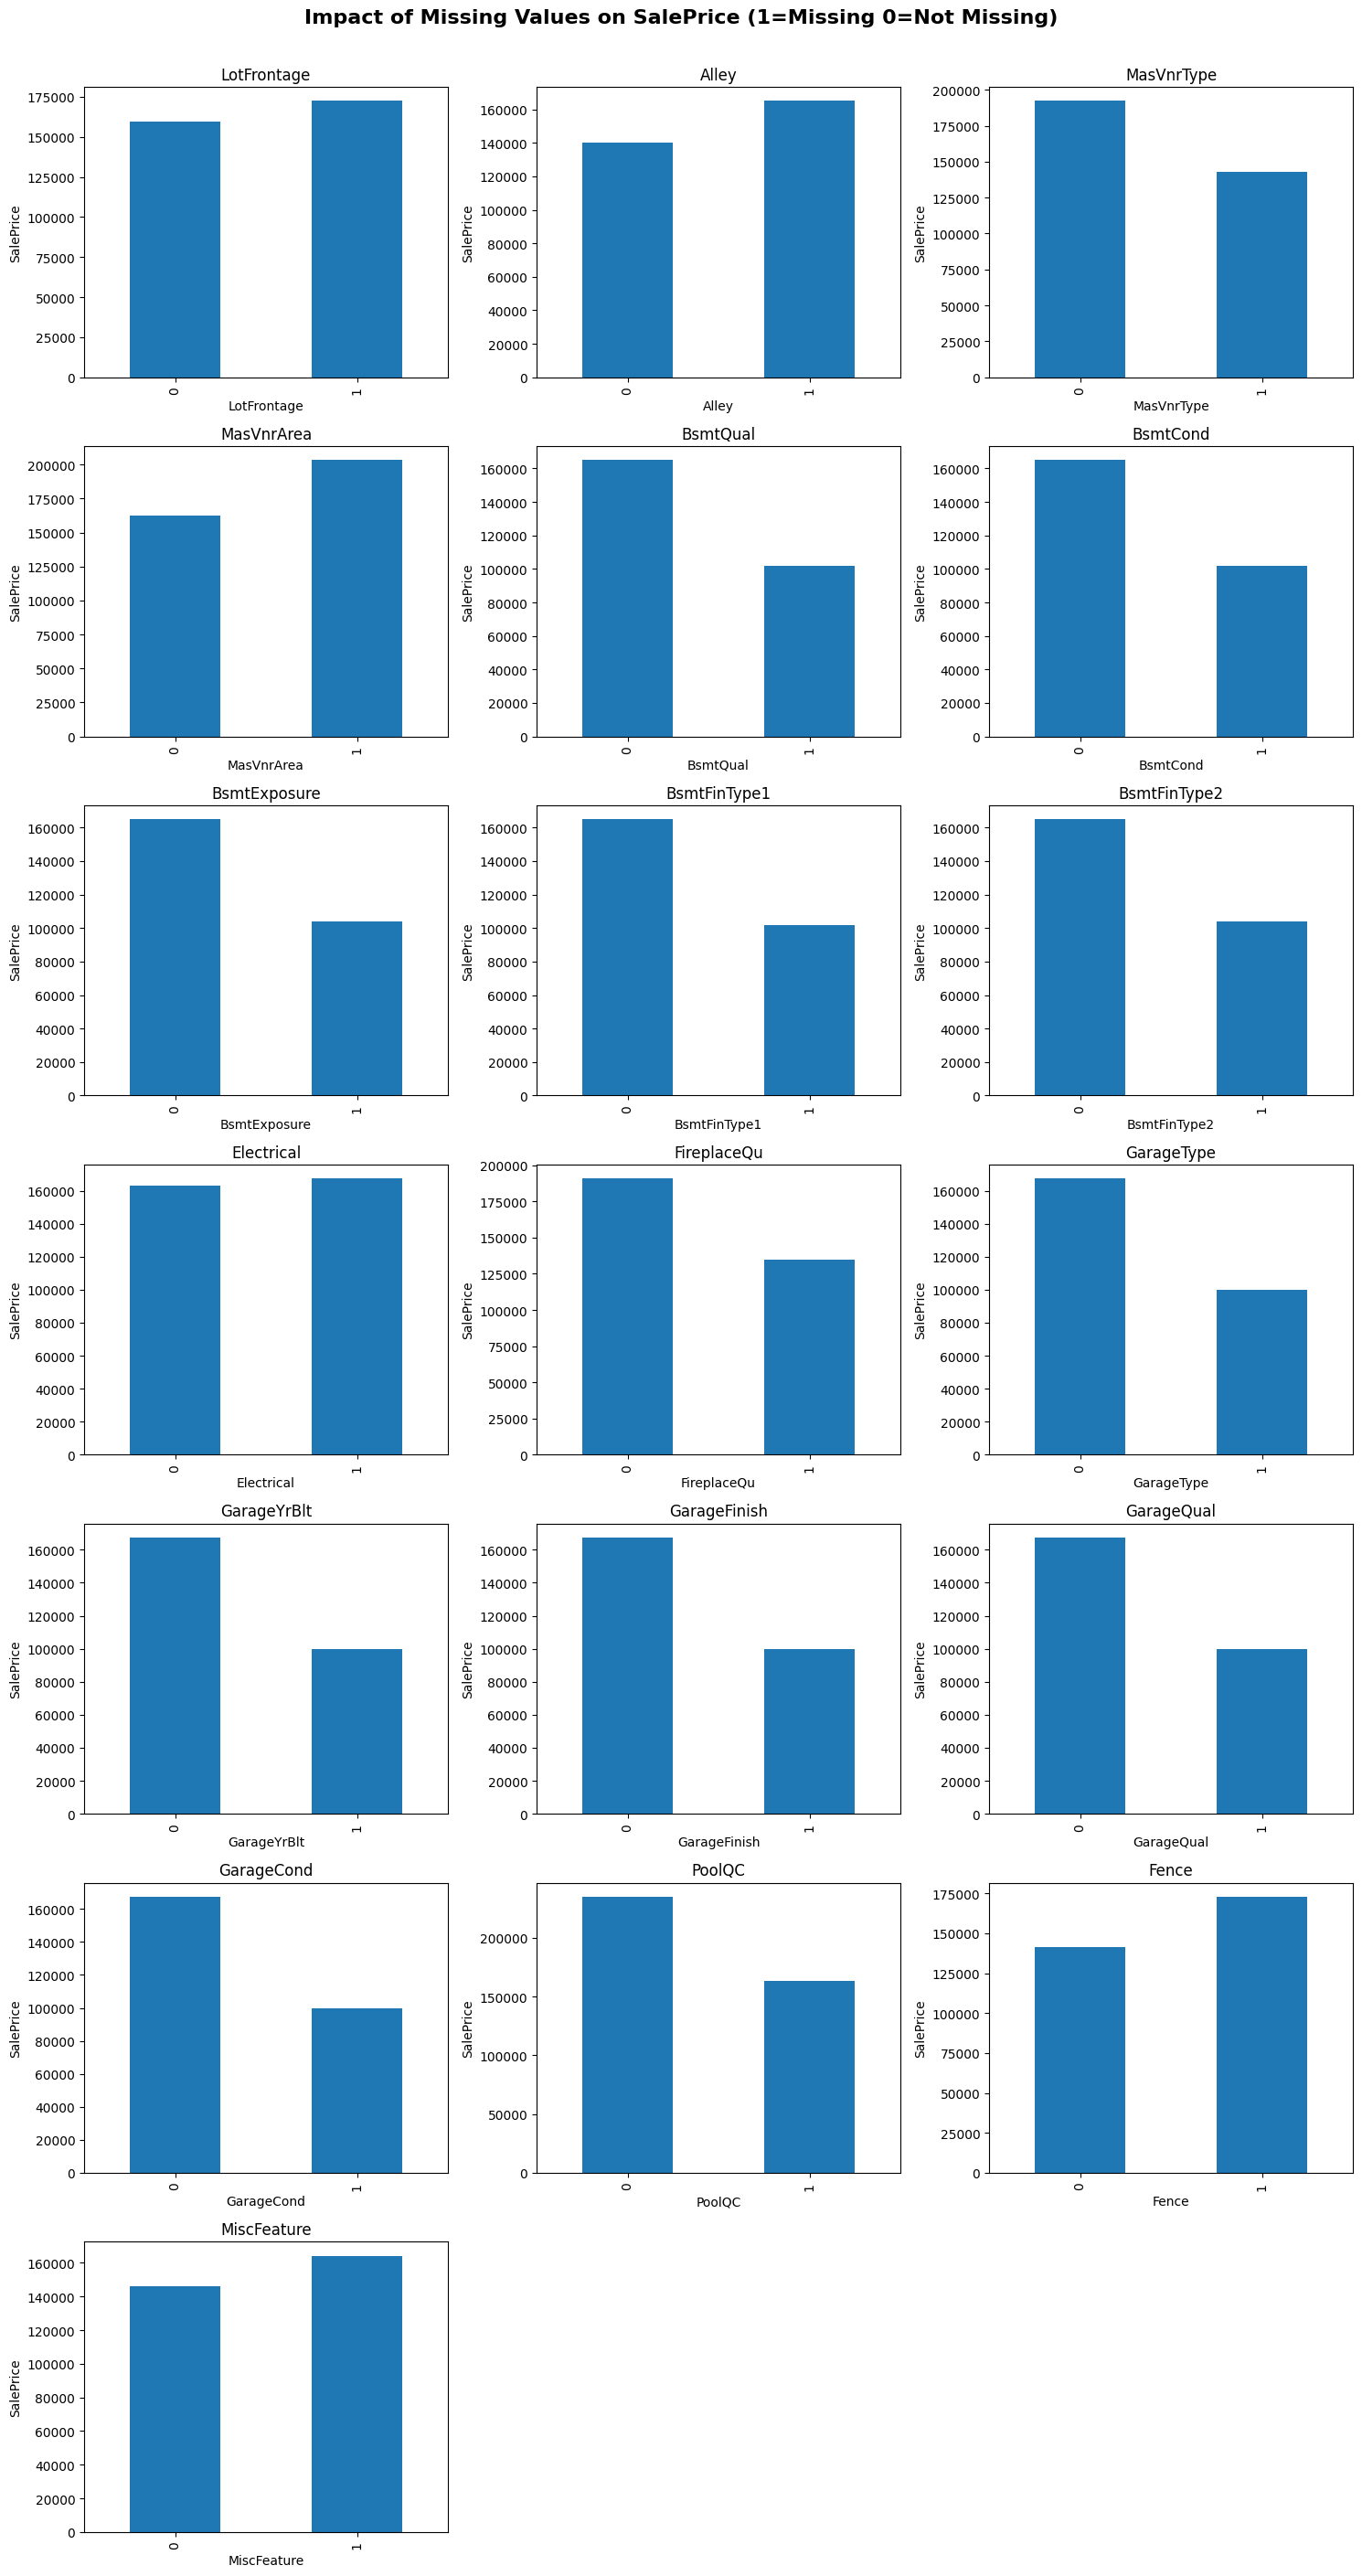

In [75]:
def bar_plot_grid(dataset, missing_vars):
    dataset_index = missing_vars.index
    cols = 3
    rows = -(-len(dataset_index) // cols)
    
    fig, ax = plt.subplots(rows, cols, figsize=(15, rows * 4))
    ax = ax.flatten()
    
    for i, feature in enumerate(dataset_index):
        dataset_temp = dataset.copy()
        dataset_temp[feature] = np.where(dataset_temp[feature].isnull(), 1, 0)
        dataset_temp.groupby(feature)['SalePrice'].median().plot.bar(ax=ax[i])
        ax[i].set_title(feature)
        ax[i].set_ylabel("SalePrice")
    
    for j in range(i + 1, len(ax)):
        ax[j].set_visible(False)
        
    plt.suptitle('Impact of Missing Values on SalePrice (1=Missing 0=Not Missing)', fontsize=16, weight='bold', y=1.005)
    plt.tight_layout()
    plt.show()
    
bar_plot_grid(train_df, missing_values)

### **2️⃣ Identify feature types**

In [56]:
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns

### **📝 To do list:**

**1. Numerical variables**
- find continuous   
    a. check for outliers  
-  check for skewness  
- find discrete  
- find temporal  

**2. Categorical variables**

### **📅 Temporal Variables (Date/Time)** 

In [ ]:
year_vars = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### **📏 Discrete Variables**

In [27]:
discrete_vars = [ feature for feature in numerical_features if len(train_df[feature].unique())<25 and feature not in year_vars+['Id'] ]
discrete_vars

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

### **🧮 Continuous Variables**

In [33]:
continuous_vars = [ feature for feature in numerical_features if feature not in discrete_vars + year_vars+['Id'] ]
continuous_vars

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

- Check for outliers